In [2]:
#loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#uploadind data
cwc_df = pd.read_csv("CWC2023.csv")

In [4]:
#inspecting
cwc_df.head()

,Match ID,Match Date,Match Time,City,Stadium,Team A,Team B,Toss Winner,Toss Decision,Score A,...,No Balls B,Penalty B,Extras B,Wining Team,Margin,Man of the Match,Umpire 1,Umpire 2,TV Umpire,Match Refree
0,1,05-10-2023,2:00 PM,Ahmedabad,Narendra Modi Stadium,England,NewZealand,NewZealand,Field,282,...,0,0,6,NewZealand,9 Wickets,Rachin Ravindra,Kumar Dharmasena,Nitin Menon,Paul Wilson,Javagal Srinath
1,2,06-10-2023,2:00 PM,Hyderabad,Eden Gardens,Pakistan,Netherlands,Netherlands,Field,286,...,1,0,9,Pakistan,81 Runs,Saud Shakeel,Adrian Holdstock,Chris Brown,Rod Tucker,Jeff Crowe
2,3,07-10-2023,2:00 PM,Dharamshala,HPCA Stadium,Afghanistan,Bangladesh,Bangladesh,Field,156,...,0,0,8,Bangladesh,6 Wickets,Mehidy Hasan Miraz,Joel Wilson,Kumar Dharmasena,Ahsan Raza,Andy Pycroft
3,4,07-10-2023,2:00 PM,Delhi,Arun Jaitley Stadium,South Africa,Sri Lanka,Sri Lanka,Field,428,...,1,0,23,South Africa,102 Runs,Aiden Markram,Richard Illingworth,Sharfuddoula,Michael Gough,Javagal Srinath
4,5,08-10-2023,2:00 PM,Chennai,M. A. Chidambaram Stadium,Australia,India,Australia,Bat,199,...,0,0,12,India,6 wickets,KL Rahul,Chris Gaffaney,Richard Kettleborough,Chris Brown,Richie Richardson


In [5]:
cwc_df.shape

(48, 44)

In [6]:
#data cleaning
cwc_df.isnull().sum()

Match ID            0
Match Date          0
Match Time          0
City                0
Stadium             0
Team A              0
Team B              0
Toss Winner         0
Toss Decision       0
Score A             0
Wickets A           0
Overs Played A      0
Maiden Overs A      0
4s A                0
6s A                0
Boundaries A        0
Runrate A           0
Leg Byes A          0
Byes A              0
Wides A             0
No Balls A          0
Penalty A           0
Extras A            0
Score B             0
Wickets B           0
Overs Played B      0
Maiden Overs B      0
4s B                0
6s B                0
Boundaries B        0
Runrate B           0
Leg Byes B          0
Byes B              0
Wides B             0
No Balls B          0
Penalty B           0
Extras B            0
Wining Team         0
Margin              0
Man of the Match    0
Umpire 1            0
Umpire 2            0
TV Umpire           0
Match Refree        0
dtype: int64

In [7]:
cwc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Match ID          48 non-null     int64  
 1   Match Date        48 non-null     object 
 2   Match Time        48 non-null     object 
 3   City              48 non-null     object 
 4   Stadium           48 non-null     object 
 5   Team A            48 non-null     object 
 6   Team B            48 non-null     object 
 7   Toss Winner       48 non-null     object 
 8   Toss Decision     48 non-null     object 
 9   Score A           48 non-null     int64  
 10  Wickets A         48 non-null     int64  
 11  Overs Played A    48 non-null     float64
 12  Maiden Overs A    48 non-null     int64  
 13  4s A              48 non-null     int64  
 14  6s A              48 non-null     int64  
 15  Boundaries A      48 non-null     int64  
 16  Runrate A         48 non-null     float64
 17 

In [8]:
#finding win rates
all_teams = pd.concat([cwc_df['Team A'], cwc_df['Team B']]).unique()
print(all_teams)

['England' 'Pakistan' 'Afghanistan' 'South Africa' 'Australia'
 'NewZealand' 'Sri Lanka' 'Bangladesh' 'Netherlands' 'India']


In [9]:
matches_played = {}
for team in all_teams:
    count = len(cwc_df[cwc_df['Team A'] == team]) + len(cwc_df[cwc_df['Team B'] == team])
    matches_played[team] = count
print(matches_played)

{'England': 9, 'Pakistan': 9, 'Afghanistan': 9, 'South Africa': 10, 'Australia': 11, 'NewZealand': 10, 'Sri Lanka': 9, 'Bangladesh': 9, 'Netherlands': 9, 'India': 11}


In [10]:
matches_won = cwc_df['Wining Team'].value_counts()
print(matches_won)

Wining Team
India           10
Australia        9
South Africa     7
NewZealand       5
Pakistan         4
Afghanistan      4
England          3
Bangladesh       2
Netherlands      2
Sri Lanka        2
Name: count, dtype: int64


In [11]:
win_rates = {}
for team in all_teams:
    win_rates[team] = (matches_won[team] / matches_played[team]) * 100

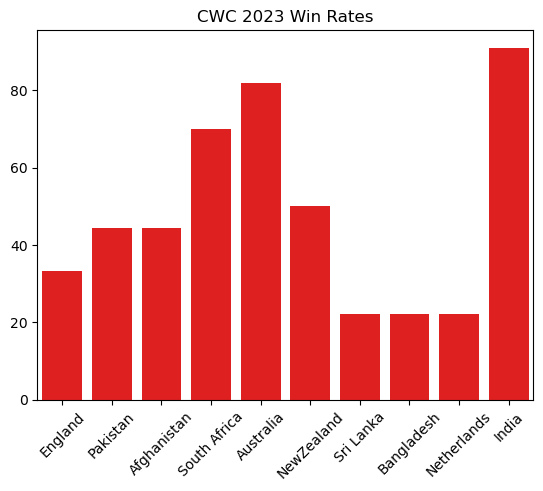

In [28]:
sns.barplot(x=list(win_rates.keys()), y=list(win_rates.values()), color='red')
plt.title('CWC 2023 Win Rates')
plt.xticks(rotation=45)
plt.savefig('Win_Rate', dpi=300, bbox_inches= 'tight', transparent=False)
plt.show()

In [13]:
#top run scorers and strike rate by batting
highest_scorer = cwc_df['Man of the Match'].value_counts()
highest_scorer

Man of the Match
Mohammed Shami            3
Travis Head               3
Adam Zampa                2
Rohit Sharma              2
Virat Kohli               2
Rassie van der Dussen     2
Fakhar Zaman              2
Glenn Maxwell             2
Quinton de Kock           2
Rachin Ravindra           1
Aiden Markram             1
Mehidy Hasan Miraz        1
Saud Shakeel              1
KL Rahul                  1
Jasprit Bumrah            1
Lockie Ferguson           1
Scott Edwards             1
Mujeeb Ur Rahman          1
Mohammad Rizwan           1
Dawid Malan               1
Mitchell Santner          1
Heinrich Klaasen          1
Sadeera Samarawickrama    1
David Warner              1
Glenn Phillips            1
Tabraiz Shamsi            1
Lahiru Kumara             1
Paul van Meekeren         1
Ibrahim Zadran            1
Fazalhaq Farooqi          1
Mohammad Nabi             1
Shakib Al Hasan           1
Ben Stokes                1
Trent Boult               1
Mitchell Marsh            1
Dav

In [14]:
pd.crosstab(cwc_df['Toss Winner'], cwc_df['Wining Team'])

Wining Team,Afghanistan,Australia,Bangladesh,England,India,Netherlands,NewZealand,Pakistan,South Africa,Sri Lanka
Toss Winner,,,,,,,,,,
Afghanistan,1,1,0,0,1,0,1,0,1,0
Australia,0,3,0,0,1,0,0,0,1,0
Bangladesh,0,0,2,1,1,0,0,1,0,0
England,1,1,0,2,1,0,0,0,1,1
India,0,0,0,0,5,0,0,0,0,0
Netherlands,1,0,0,0,0,1,1,1,0,1
NewZealand,0,1,0,0,0,0,3,0,1,0
Pakistan,1,1,0,0,0,0,0,1,1,0
South Africa,0,1,0,0,0,1,0,0,1,0


In [15]:
toss_win_advantage = (cwc_df['Toss Winner'] == cwc_df['Wining Team']).mean() * 100

In [16]:
avg_run_rates = cwc_df.groupby('Wining Team')['Runrate A'].mean().sort_values()

In [17]:
avg_run_rates

Wining Team
Netherlands     4.520000
Bangladesh      4.900000
Sri Lanka       4.975000
NewZealand      5.280000
Afghanistan     5.482500
India           5.887000
Australia       6.162222
England         6.270000
Pakistan        6.757500
South Africa    6.885714
Name: Runrate A, dtype: float64

In [18]:
#Does winning the toss increase winning chances?
correct_predictions = (cwc_df["Toss Winner"] == cwc_df["Wining Team"]).sum()

In [19]:
total_matches = len(cwc_df)

In [20]:
win_percentage = (correct_predictions/total_matches) * 100
print(win_percentage)

39.58333333333333


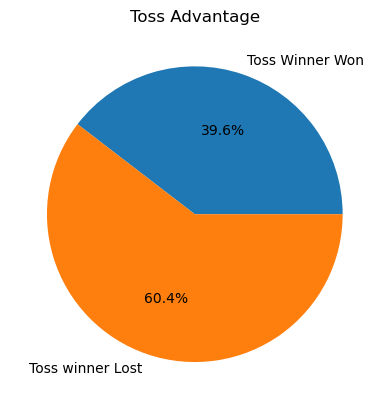

In [29]:
plt.pie([win_percentage, 100-win_percentage],
        labels=['Toss Winner Won', 'Toss winner Lost'] ,
        autopct = '%1.1f%%')
plt.savefig('Toss_Advantage', dpi=300, bbox_inches='tight')
plt.title("Toss Advantage")
plt.show()

In [22]:
#Runrates
cwc_df['Runrate B'] = pd.to_numeric(cwc_df['Runrate B'], errors='coerce').astype(float)

In [23]:
cwc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Match ID          48 non-null     int64  
 1   Match Date        48 non-null     object 
 2   Match Time        48 non-null     object 
 3   City              48 non-null     object 
 4   Stadium           48 non-null     object 
 5   Team A            48 non-null     object 
 6   Team B            48 non-null     object 
 7   Toss Winner       48 non-null     object 
 8   Toss Decision     48 non-null     object 
 9   Score A           48 non-null     int64  
 10  Wickets A         48 non-null     int64  
 11  Overs Played A    48 non-null     float64
 12  Maiden Overs A    48 non-null     int64  
 13  4s A              48 non-null     int64  
 14  6s A              48 non-null     int64  
 15  Boundaries A      48 non-null     int64  
 16  Runrate A         48 non-null     float64
 17 

In [24]:
cwc_df['Max Run Rate'] = cwc_df[['Runrate A', 'Runrate B']].max(axis=1)

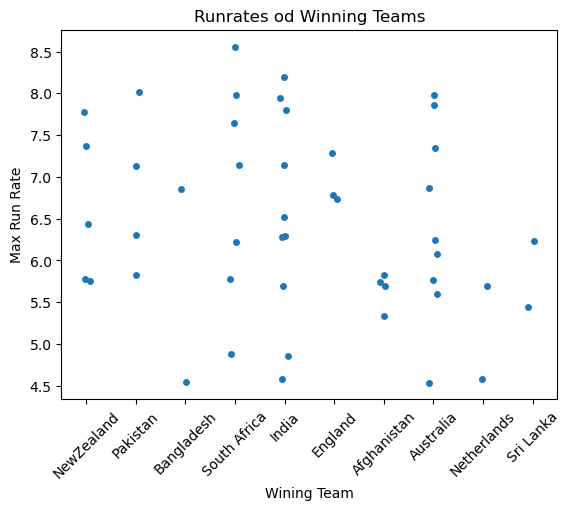

In [25]:
sns.stripplot(x= "Wining Team", y= "Max Run Rate" , data = cwc_df, jitter=True)
plt.xticks(rotation=45)
plt.title("Runrates od Winning Teams")
plt.show()